# Global

# Step 1: Read the CSV File

In [19]:
import numpy as np
import pandas as pd

# Read the CSV file (replace 'tap_water.csv' with your actual file path)
csv_file = 'tap_water.csv'
data = pd.read_csv(csv_file)

# Extract the spectral values (assuming the column name is 'Reflectance')
y = data['Reflectance'].to_numpy()


# Step 2: Calculate Spectral Bounds

In [22]:
# Constants for spectral bounds
xmin = np.min(y)
xmax = np.max(y)

# Adaptive coefficient for DNA encoding (rho)
rho = 0.7  # You can adjust this value between 0.5 and 1

# Number of spectral bands (length of y)
Nb = len(y)


# Step 3: Calculate Thresholds

In [23]:
# Calculate T0: the average of the spectral bands scaled by ρ
T0 = rho * np.sum(y) / Nb

# Define max(yi) and min(yi) functions for threshold calculations
def max_yi(yi, T0):
    return yi if yi >= T0 else 0

def min_yi(yi, T0):
    return yi if yi < T0 else 0

# Calculate k and p: the number of bands greater than T0 and smaller than T0
k = np.sum([1 for yi in y if yi >= T0])
p = np.sum([1 for yi in y if yi < T0])

# Calculate Tl and Tr using the min and max functions
Tl = np.sum([min_yi(yi, T0) for yi in y]) / p if p > 0 else 0
Tr = np.sum([max_yi(yi, T0) for yi in y]) / k if k > 0 else 0

# Print calculated thresholds
print(f"T0: {T0}, Tl: {Tl}, Tr: {Tr}")


T0: 1.499589694092827, Tl: 1.0903936218678816, Tr: 2.3342768814968817


# Step 4: DNA Encoding

In [24]:
# DNA encoding based on thresholds
def dna_encoding(yi, xmin, Tl, T0, Tr, xmax):
    if xmin <= yi < Tl:
        return 'T'  # Corresponds to yi in [xmin, Tl)
    elif Tl <= yi < T0:
        return 'C'  # Corresponds to yi in [Tl, T0)
    elif T0 <= yi < Tr:
        return 'A'  # Corresponds to yi in [T0, Tr)
    elif Tr <= yi <= xmax:
        return 'G'  # Corresponds to yi in [Tr, xmax]
    else:
        return None  # Fallback in case no condition is met

# Encode the full spectral signature into DNA codewords
dna_codewords = [dna_encoding(yi, xmin, Tl, T0, Tr, xmax) for yi in y]

# Print the resulting DNA codewords
print("DNA Codewords:", dna_codewords)


DNA Codewords: ['G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',

# Step 5: Plotting the DNA Codewords

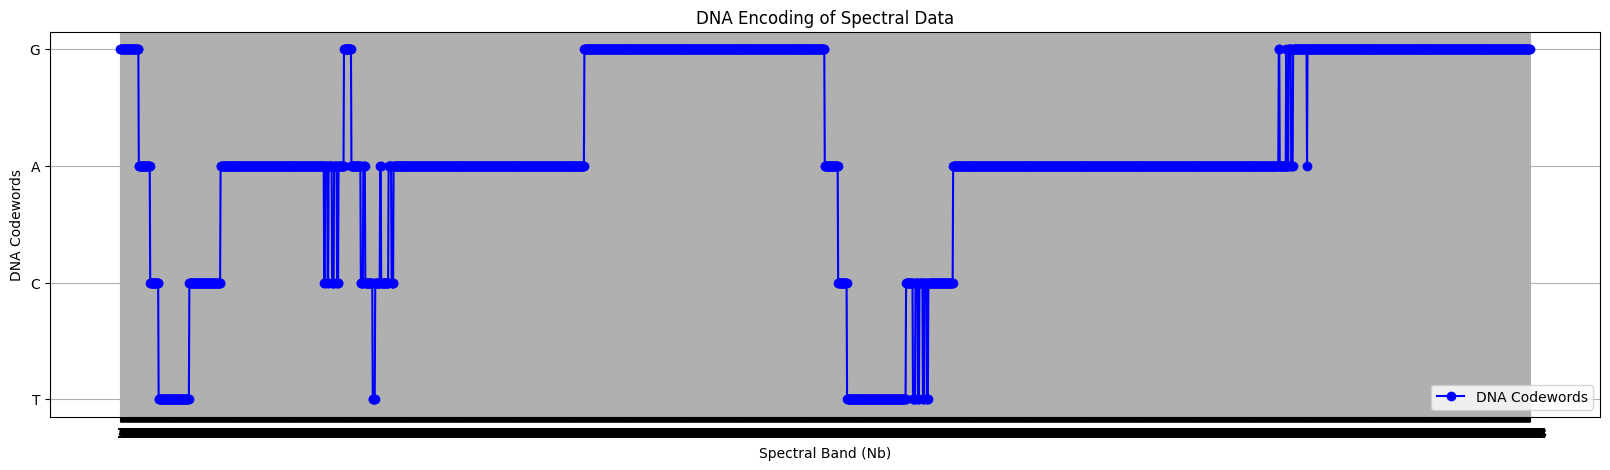

In [28]:
import matplotlib.pyplot as plt

# Map DNA codewords to numbers for plotting
codeword_map = {'T': 0, 'C': 1, 'A': 2, 'G': 3}
numeric_codewords = [codeword_map[code] for code in dna_codewords]

# Plotting the DNA codewords
plt.figure(figsize=(20, 5))
plt.plot(range(Nb), numeric_codewords, marker='o', linestyle='-', color='b', label="DNA Codewords")
plt.xticks(ticks=range(Nb), labels=range(1, Nb+1))
plt.yticks(ticks=[0, 1, 2, 3], labels=['T', 'C', 'A', 'G'])
plt.xlabel("Spectral Band (Nb)")
plt.ylabel("DNA Codewords")
plt.title("DNA Encoding of Spectral Data")
plt.legend()
plt.grid(True)
plt.show()


# Gradient

# Step 1: Read the CSV File

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the CSV file
csv_file = 'tap_water.csv'  # Update this with the actual path to your CSV file
data = pd.read_csv(csv_file)

# Assuming the CSV contains a column named 'Reflectance'
# Replace 'Reflectance' with the actual column name if it's different
y = data['Reflectance'].to_numpy()

# Number of spectral bands (Nb)
Nb = len(y)

print("Spectral Signature (y) from CSV:")
print(y)


Spectral Signature (y) from CSV:
[3.8716 3.8384 3.7951 ... 2.7435 2.7427 2.7427]


# Step 2: Define the Tolerance Δ

In [55]:
# Step 2: Define the Tolerance Δ
theta = 1.5  # Adaptive gradient coefficient (adjustable)
delta = theta * (1 / (Nb - 1)) * np.sum(np.abs(np.diff(y)))

print(f"\nCalculated Tolerance Δ: {delta:.2f}")



Calculated Tolerance Δ: 0.04


# Step 3: Define Gradient Change Types and Encode into DNA Codewords

In [56]:
# Step 3: Define Gradient Change Types and Encode into DNA Codewords
def encode_gradient_dna(y, delta):
    dna_codewords = []
    
    for i in range(1, Nb - 1):
        change1 = abs(y[i] - y[i - 1])  # Change from the previous band
        change2 = abs(y[i + 1] - y[i])  # Change to the next band
        
        if change1 <= delta and change2 <= delta:
            dna_codewords.append('T')  # Type 1
        elif (change1 <= delta and change2 > delta) or (change1 > delta and change2 <= delta):
            dna_codewords.append('C')  # Type 2
        elif (y[i] - y[i - 1] < -delta and y[i + 1] - y[i] < -delta) or (y[i] - y[i - 1] > delta and y[i + 1] - y[i] > delta):
            dna_codewords.append('A')  # Type 3
        elif (y[i] - y[i - 1] < -delta and y[i + 1] - y[i] > delta) or (y[i] - y[i - 1] > delta and y[i + 1] - y[i] < -delta):
            dna_codewords.append('G')  # Type 4
        else:
            dna_codewords.append(None)  # Fallback

    return dna_codewords

# Step 4: Encode the Spectral Gradient into DNA Codewords
gradient_dna_codewords = encode_gradient_dna(y, delta)

print("\nEncoded DNA Codewords based on Gradient Changes:")
print(gradient_dna_codewords)



Encoded DNA Codewords based on Gradient Changes:
['C', 'A', 'A', 'C', 'T', 'C', 'C', 'C', 'A', 'A', 'C', 'T', 'T', 'T', 'T', 'C', 'A', 'A', 'C', 'C', 'C', 'T', 'T', 'C', 'A', 'A', 'C', 'C', 'C', 'T', 'T', 'T', 'T', 'T', 'T', 'C', 'A', 'A', 'C', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T',

# Step 5: Visualize the Results

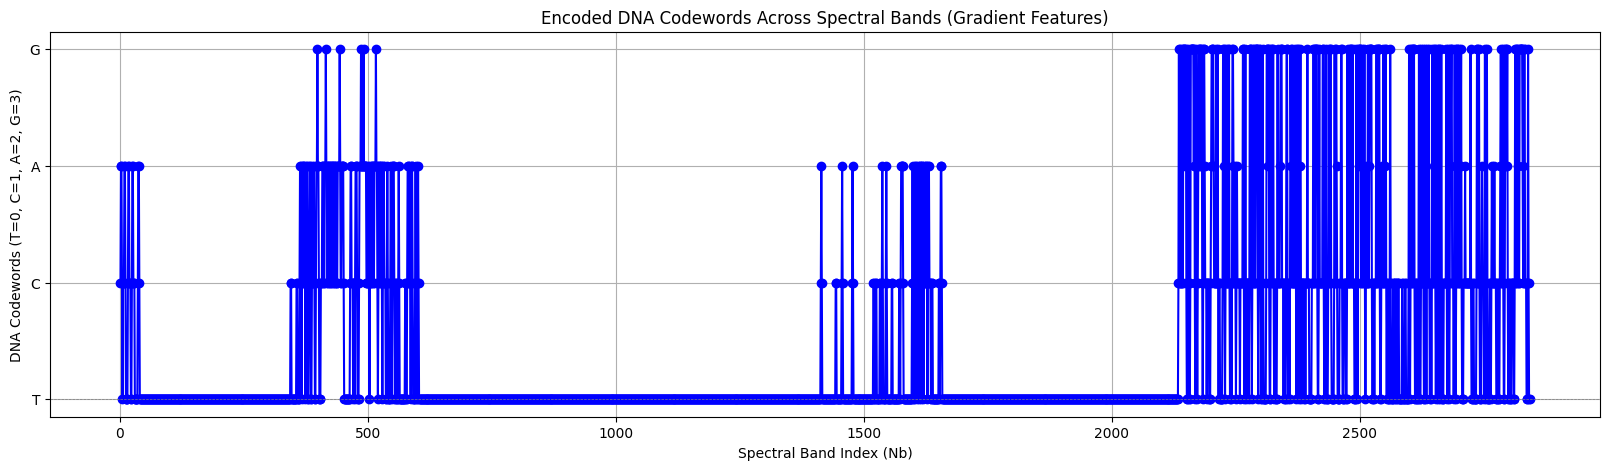

In [57]:
# Step 5: Visualize the Results
# Map DNA codewords to numeric values for plotting
codeword_map = {'G': 3, 'A': 2, 'C': 1, 'T': 0}
dna_numeric = [codeword_map[code] if code in codeword_map else -1 for code in gradient_dna_codewords]

# Plotting the DNA codewords with the corresponding numeric values
plt.figure(figsize=(20, 5))
plt.plot(np.arange(1, Nb - 1), dna_numeric, marker='o', linestyle='-', color='b')

# Adding labels and title
plt.xlabel('Spectral Band Index (Nb)')
plt.ylabel('DNA Codewords (T=0, C=1, A=2, G=3)')
plt.title('Encoded DNA Codewords Across Spectral Bands (Gradient Features)')

# Set y-ticks to represent the DNA codewords
plt.yticks([0, 1, 2, 3], ['T', 'C', 'A', 'G'])

# Show the plot
plt.grid(True)
plt.axhline(0, color='gray', linewidth=0.5, linestyle='--')  # Add a horizontal line for better visualization
plt.show()


# Global & Gradient in this code

Spectral Data (y):
[3.8716 3.8384 3.7951 ... 2.7435 2.7427 2.7427]

Thresholds:
 Tmin = 0.47, Tl = 0.98, T0 = 1.50, Tr = 2.76, Tmax = 4.02

Global DNA Codewords:
['G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C

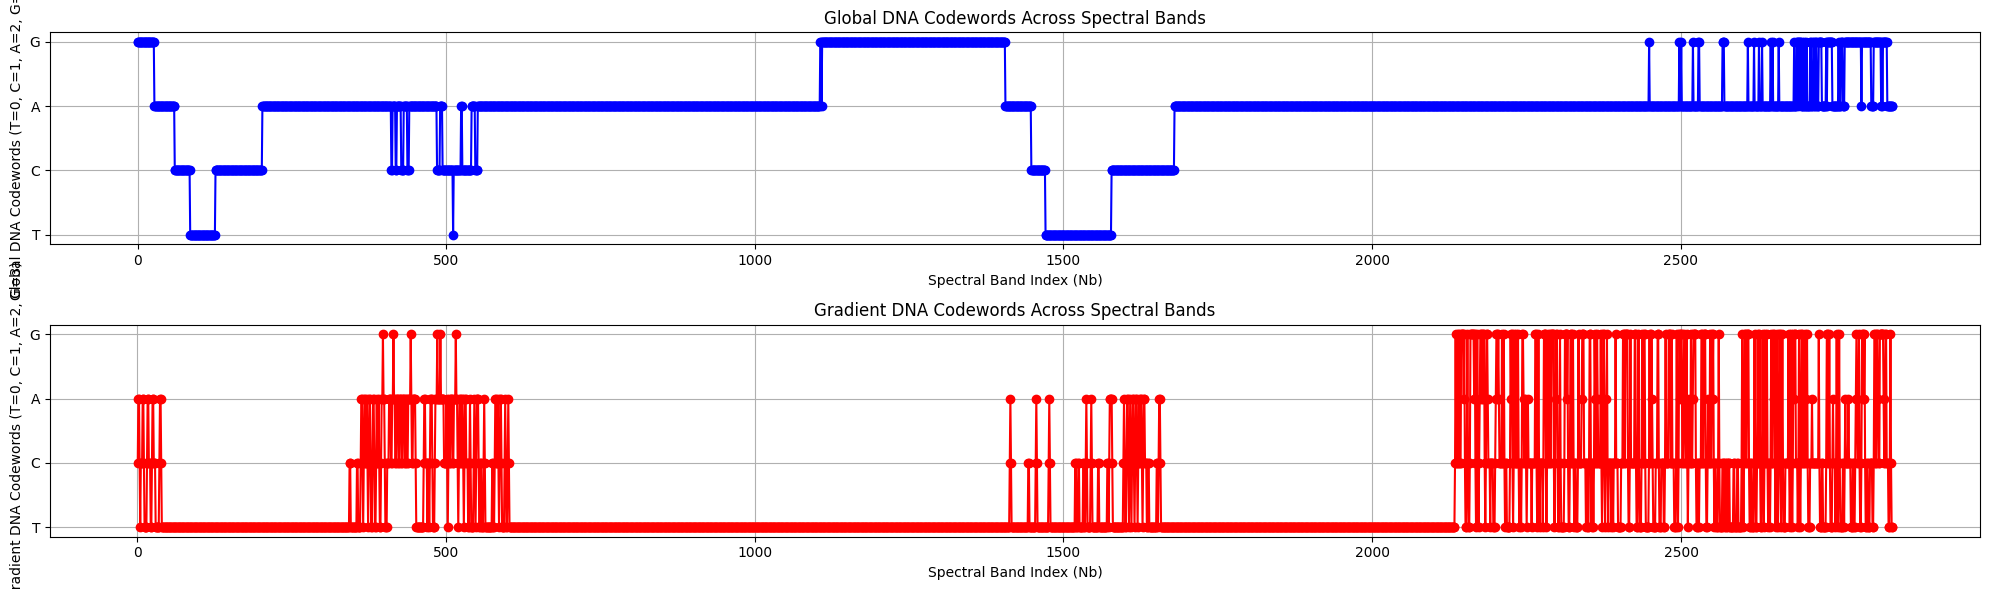

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the CSV file (replace with the actual file path)
csv_file = 'tap_water.csv'  # Replace with actual CSV file
data = pd.read_csv(csv_file)

# Assuming the spectral data column is called 'Reflectance'
y = data['Reflectance'].to_numpy()

# Number of spectral bands
Nb = len(y)
print(f"Spectral Data (y):\n{y}\n")

# Step 2: Calculate thresholds (Tmin, Tlow, T0, Thigh, Tmax)
rho = 0.7  # Coefficient for the threshold calculation
T0 = rho * np.mean(y)

# Discretization thresholds
Tmin = np.min(y)
Tmax = np.max(y)
Tl = (Tmin + T0) / 2  # Lower threshold
Tr = (Tmax + T0) / 2  # Upper threshold

print(f"Thresholds:\n Tmin = {Tmin:.2f}, Tl = {Tl:.2f}, T0 = {T0:.2f}, Tr = {Tr:.2f}, Tmax = {Tmax:.2f}\n")

# Step 3: DNA encoding based on thresholds
def dna_encoding(yi, Tmin, Tl, T0, Tr, Tmax):
    if Tmin <= yi < Tl:
        return 'T'  # Category 1
    elif Tl <= yi < T0:
        return 'C'  # Category 2
    elif T0 <= yi < Tr:
        return 'A'  # Category 3
    elif Tr <= yi <= Tmax:
        return 'G'  # Category 4
    else:
        return None

# Apply the encoding to the entire spectral data
dna_codewords_global = [dna_encoding(yi, Tmin, Tl, T0, Tr, Tmax) for yi in y]
print("Global DNA Codewords:")
print(dna_codewords_global)

# Step 4: Define Gradient Changes and Encode Gradient Features
def encode_gradient_dna(y, delta):
    dna_codewords_gradient = []
    
    for i in range(1, Nb - 1):
        change1 = abs(y[i] - y[i - 1])  # Change from the previous band
        change2 = abs(y[i + 1] - y[i])  # Change to the next band
        
        if change1 <= delta and change2 <= delta:
            dna_codewords_gradient.append('T')  # Type 1
        elif (change1 <= delta and change2 > delta) or (change1 > delta and change2 <= delta):
            dna_codewords_gradient.append('C')  # Type 2
        elif (y[i] - y[i - 1] < -delta and y[i + 1] - y[i] < -delta) or (y[i] - y[i - 1] > delta and y[i + 1] - y[i] > delta):
            dna_codewords_gradient.append('A')  # Type 3
        elif (y[i] - y[i - 1] < -delta and y[i + 1] - y[i] > delta) or (y[i] - y[i - 1] > delta and y[i + 1] - y[i] < -delta):
            dna_codewords_gradient.append('G')  # Type 4
        else:
            dna_codewords_gradient.append(None)  # Fallback

    return dna_codewords_gradient

# Step 4: Calculate delta (tolerance for gradient changes)
theta = 1.5  # Adaptive gradient coefficient
delta = theta * (1 / (Nb - 1)) * np.sum(np.abs(np.diff(y)))

# Encode gradient features
dna_codewords_gradient = encode_gradient_dna(y, delta)
print("\nGradient DNA Codewords:")
print(dna_codewords_gradient)

# Step 5: Plot the results
# Map DNA codewords to numeric values for plotting
codeword_map = {'T': 0, 'C': 1, 'A': 2, 'G': 3}

# Convert codewords to numeric values
dna_numeric_global = [codeword_map[code] for code in dna_codewords_global]
dna_numeric_gradient = [codeword_map[code] if code else -1 for code in dna_codewords_gradient]

# Plotting the DNA codewords
plt.figure(figsize=(20, 6))

# Global DNA codewords plot
plt.subplot(2, 1, 1)
plt.plot(np.arange(Nb), dna_numeric_global, marker='o', linestyle='-', color='b')
plt.xlabel('Spectral Band Index (Nb)')
plt.ylabel('Global DNA Codewords (T=0, C=1, A=2, G=3)')
plt.title('Global DNA Codewords Across Spectral Bands')
plt.yticks([0, 1, 2, 3], ['T', 'C', 'A', 'G'])
plt.grid(True)

# Gradient DNA codewords plot
plt.subplot(2, 1, 2)
plt.plot(np.arange(1, Nb - 1), dna_numeric_gradient, marker='o', linestyle='-', color='r')
plt.xlabel('Spectral Band Index (Nb)')
plt.ylabel('Gradient DNA Codewords (T=0, C=1, A=2, G=3)')
plt.title('Gradient DNA Codewords Across Spectral Bands')
plt.yticks([0, 1, 2, 3], ['T', 'C', 'A', 'G'])
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


# Finding the SDNA


SDNA Global Features:
['T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', '

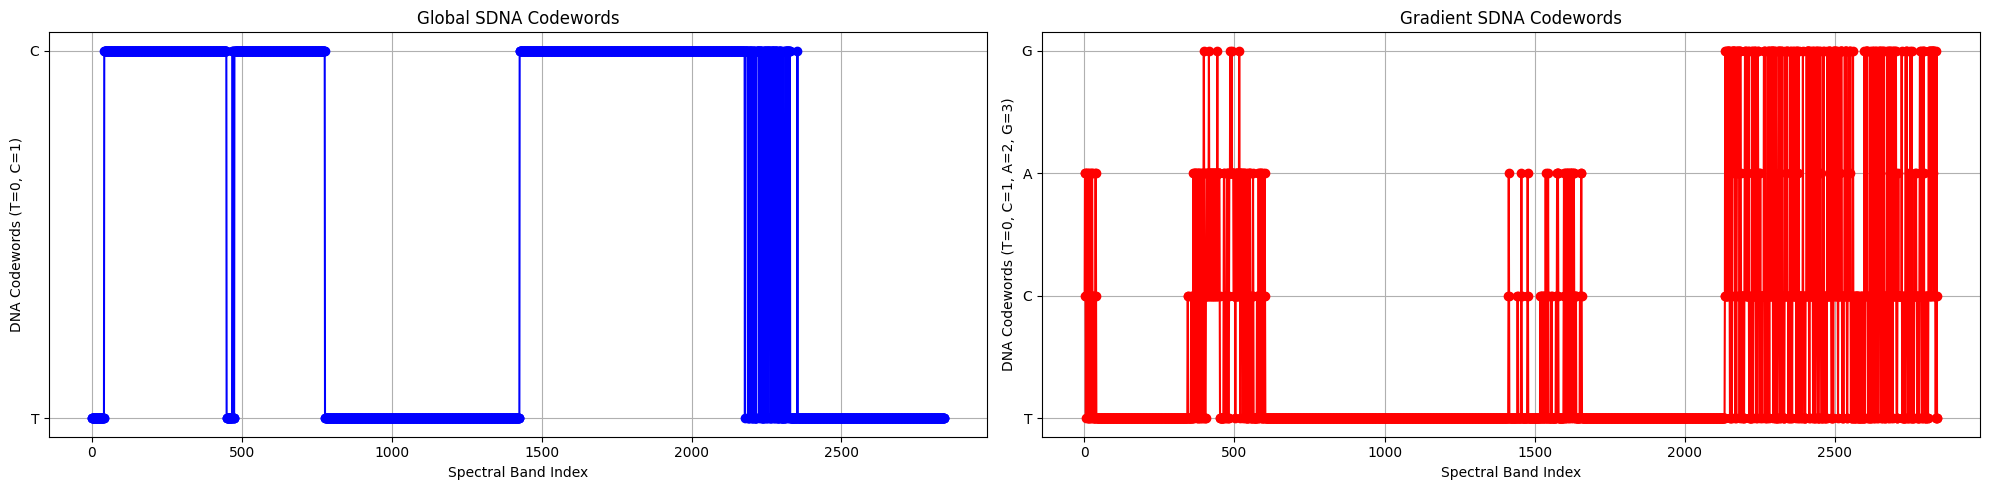

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the CSV file
csv_file = 'tap_water.csv'  # Update this with the actual path to your CSV file
data = pd.read_csv(csv_file)

# Assuming the CSV contains a column named 'Reflectance'
y = data['Reflectance'].to_numpy()

# Number of spectral bands (Nb)
Nb = len(y)

# Step 2: Define the Tolerance Δ
theta = 1.5  # Adaptive gradient coefficient (adjustable)
delta = theta * (1 / (Nb - 1)) * np.sum(np.abs(np.diff(y)))

# Step 3: Define Gradient Change Types and Encode into DNA Codewords
def encode_gradient_dna(y, delta):
    dna_codewords = []
    
    for i in range(1, Nb - 1):
        change1 = abs(y[i] - y[i - 1])  # Change from the previous band
        change2 = abs(y[i + 1] - y[i])  # Change to the next band
        
        if change1 <= delta and change2 <= delta:
            dna_codewords.append('T')  # Type 1
        elif (change1 <= delta and change2 > delta) or (change1 > delta and change2 <= delta):
            dna_codewords.append('C')  # Type 2
        elif (y[i] - y[i - 1] < -delta and y[i + 1] - y[i] < -delta) or (y[i] - y[i - 1] > delta and y[i + 1] - y[i] > delta):
            dna_codewords.append('A')  # Type 3
        elif (y[i] - y[i - 1] < -delta and y[i + 1] - y[i] > delta) or (y[i] - y[i - 1] > delta and y[i + 1] - y[i] < -delta):
            dna_codewords.append('G')  # Type 4
        else:
            dna_codewords.append(None)  # Fallback

    return dna_codewords

# Step 4: Encode the Spectral Gradient into DNA Codewords
gradient_dna_codewords = encode_gradient_dna(y, delta)

# Step 5: Encode Global Features into DNA Codewords
def encode_global_dna(y):
    # For simplicity, we can just encode based on whether the value is above or below the mean
    mean_value = np.mean(y)
    return ['T' if yi >= mean_value else 'C' for yi in y]

global_dna_codewords = encode_global_dna(y)

# Step 6: Combine Global and Gradient Features to Form SDNA
SDNA = {
    'SDNA_global': global_dna_codewords,
    'SDNA_gradient': gradient_dna_codewords
}

print("\nSDNA Global Features:")
print(SDNA['SDNA_global'])

print("\nSDNA Gradient Features:")
print(SDNA['SDNA_gradient'])

# Step 7: Map DNA codewords to numeric values for plotting
codeword_map = {'T': 0, 'C': 1, 'A': 2, 'G': 3}

# Prepare numeric representations for the plotting
global_numeric = [codeword_map[code] for code in SDNA['SDNA_global']]
gradient_numeric = [codeword_map[code] for code in SDNA['SDNA_gradient'] if code is not None]

# Prepare x-axis values (indices)
global_x = np.arange(len(SDNA['SDNA_global']))
gradient_x = np.arange(1, Nb - 1)  # Because gradient codes have fewer elements

# Step 8: Plot the Global SDNA Codewords
plt.figure(figsize=(20, 5))

# Plotting Global DNA Codewords
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(global_x, global_numeric, marker='o', linestyle='-', color='b')
plt.title('Global SDNA Codewords')
plt.xlabel('Spectral Band Index')
plt.ylabel('DNA Codewords (T=0, C=1)')
plt.yticks([0, 1], ['T', 'C'])
plt.grid(True)

# Plotting Gradient DNA Codewords
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(gradient_x, gradient_numeric, marker='o', linestyle='-', color='r')
plt.title('Gradient SDNA Codewords')
plt.xlabel('Spectral Band Index')
plt.ylabel('DNA Codewords (T=0, C=1, A=2, G=3)')
plt.yticks([0, 1, 2, 3], ['T', 'C', 'A', 'G'])
plt.grid(True)

# Show both plots
plt.tight_layout()
plt.show()


# Code to Find SI and SV:

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Read the CSV file (assuming the file has been already provided)
csv_file = 'tap_water.csv'  # Update with the actual path to your CSV file
data = pd.read_csv(csv_file)

# Assuming the CSV contains a column named 'Reflectance'
y = data['Reflectance'].to_numpy()

# Number of spectral bands (Nb)
Nb = len(y)

# Step 2: Split the dataset into SI (Initialization set) and SV (Fitness evaluation set)
# Example: Split 70% for SI (initialization), 30% for SV (fitness evaluation)
SI, SV = train_test_split(y, test_size=0.3, random_state=42)

# Step 3: Encode SI into DNA strands for initial population
def encode_dna_sequence(data, delta):
    dna_codewords = []
    for i in range(1, len(data) - 1):
        change1 = abs(data[i] - data[i - 1])
        change2 = abs(data[i + 1] - data[i])
        if change1 <= delta and change2 <= delta:
            dna_codewords.append('T')
        elif (change1 <= delta and change2 > delta) or (change1 > delta and change2 <= delta):
            dna_codewords.append('C')
        elif (data[i] - data[i - 1] < -delta and data[i + 1] - data[i] < -delta) or (data[i] - data[i - 1] > delta and data[i + 1] - data[i] > delta):
            dna_codewords.append('A')
        elif (data[i] - data[i - 1] < -delta and data[i + 1] - data[i] > delta) or (data[i] - data[i - 1] > delta and data[i + 1] - data[i] < -delta):
            dna_codewords.append('G')
        else:
            dna_codewords.append(None)  # Fallback in case none match
    return dna_codewords

# Step 4: Define delta (tolerance value) as per the formula
theta = 1.5  # Adjustable adaptive gradient coefficient
delta = theta * (1 / (Nb - 1)) * np.sum(np.abs(np.diff(SI)))

# Step 5: Encode SI and SV
SI_dna_codewords = encode_dna_sequence(SI, delta)
SV_dna_codewords = encode_dna_sequence(SV, delta)

# Step 6: Split DNA codewords into global and gradient sequences
def split_global_gradient(dna_codewords):
    # Assuming we are splitting halfway into global and gradient
    half = len(dna_codewords) // 2
    Sl_DNA_global = dna_codewords[:half]
    Sl_DNA_gradient = dna_codewords[half:]
    return Sl_DNA_global, Sl_DNA_gradient

# Find global and gradient sequences for SI and SV
SI_global, SI_gradient = split_global_gradient(SI_dna_codewords)
SV_global, SV_gradient = split_global_gradient(SV_dna_codewords)

# Step 7: Output the global and gradient DNA codewords
print("\nSI Global DNA Codewords:")
print(SI_global)
print("\nSI Gradient DNA Codewords:")
print(SI_gradient)

print("\nSV Global DNA Codewords:")
print(SV_global)
print("\nSV Gradient DNA Codewords:")
print(SV_gradient)



SI Global DNA Codewords:
['G', 'C', 'T', 'T', 'C', 'G', 'C', 'T', 'T', 'T', 'T', 'C', 'G', 'C', 'T', 'C', 'G', 'C', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'C', 'G', 'C', 'T', 'T', 'T', 'T', 'T', 'T', 'C', 'C', 'T', 'T', 'T', 'T', 'C', 'C', 'C', 'G', 'C', 'C', 'G', 'G', 'C', 'T', 'T', 'T', 'C', 'C', 'T', 'T', 'C', 'C', 'T', 'T', 'C', 'C', 'T', 'T', 'C', 'G', 'C', 'T', 'T', 'C', 'G', 'A', 'G', 'C', 'T', 'T', 'T', 'T', 'T', 'C', 'G', 'C', 'T', 'T', 'T', 'C', 'A', 'G', 'G', 'C', 'T', 'T', 'T', 'T', 'T', 'T', 'C', 'G', 'C', 'T', 'T', 'T', 'C', 'G', 'C', 'C', 'C', 'C', 'G', 'G', 'G', 'C', 'C', 'C', 'T', 'C', 'G', 'G', 'G', 'C', 'C', 'C', 'T', 'T', 'T', 'T', 'C', 'G', 'G', 'G', 'C', 'T', 'C', 'C', 'T', 'T', 'T', 'T', 'C', 'G', 'C', 'C', 'A', 'G', 'C', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'C', 'G', 'G', 'G', 'C', 'T', 'T', 'C', 'C', 'C', 'G', 'C', 'T', 'T', 'C', 'G', 'C', 'T', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'G', 'C', 'T', 'C', 'A', 'G'

# HD, AVD, PVD

# tap_water

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Read the CSV file
csv_file = 'tap_water.csv'  # Update with the actual path to your CSV file
data = pd.read_csv(csv_file)

# Assuming the CSV contains a column named 'Reflectance'
y = data['Reflectance'].to_numpy()

# Number of spectral bands (Nb)
Nb = len(y)

# Step 2: Split the dataset into SI (Initialization set) and SV (Fitness evaluation set)
SI, SV = train_test_split(y, test_size=0.3, random_state=42)

# Step 3: Encode SI into DNA strands for initial population
def encode_dna_sequence(data, delta):
    dna_codewords = []
    for i in range(1, len(data) - 1):
        change1 = abs(data[i] - data[i - 1])
        change2 = abs(data[i + 1] - data[i])
        if change1 <= delta and change2 <= delta:
            dna_codewords.append('T')
        elif (change1 <= delta and change2 > delta) or (change1 > delta and change2 <= delta):
            dna_codewords.append('C')
        elif (data[i] - data[i - 1] < -delta and data[i + 1] - data[i] < -delta) or (data[i] - data[i - 1] > delta and data[i + 1] - data[i] > delta):
            dna_codewords.append('A')
        elif (data[i] - data[i - 1] < -delta and data[i + 1] - data[i] > delta) or (data[i] - data[i - 1] > delta and data[i + 1] - data[i] < -delta):
            dna_codewords.append('G')
        else:
            dna_codewords.append(None)  # Fallback in case none match
    return dna_codewords

# Step 4: Define delta (tolerance value) as per the formula
theta = 1.5  # Adjustable adaptive gradient coefficient
delta = theta * (1 / (Nb - 1)) * np.sum(np.abs(np.diff(SI)))

# Step 5: Encode SI and SV
SI_dna_codewords = encode_dna_sequence(SI, delta)
SV_dna_codewords = encode_dna_sequence(SV, delta)

# Step 6: Split DNA codewords into global and gradient sequences
def split_global_gradient(dna_codewords):
    half = len(dna_codewords) // 2
    Sl_DNA_global = dna_codewords[:half]
    Sl_DNA_gradient = dna_codewords[half:]
    return Sl_DNA_global, Sl_DNA_gradient

# Find global and gradient sequences for SI and SV
SI_global, SI_gradient = split_global_gradient(SI_dna_codewords)
SV_global, SV_gradient = split_global_gradient(SV_dna_codewords)

# Output global and gradient DNA codewords
print("\nSI Global DNA Codewords:", SI_global)
print("SI Gradient DNA Codewords:", SI_gradient)
print("\nSV Global DNA Codewords:", SV_global)
print("SV Gradient DNA Codewords:", SV_gradient)

# Function to encode DNA sequences into binary
def encode_dna(dna_sequence):
    codeword_map = {'T': '00', 'C': '01', 'A': '10', 'G': '11'}
    return [codeword_map[base] for base in dna_sequence if base is not None]

# Encode the global and gradient sequences
encoded_global1 = encode_dna(SI_global)
encoded_gradient1 = encode_dna(SI_gradient)

encoded_global2 = encode_dna(SV_global)
encoded_gradient2 = encode_dna(SV_gradient)

# Calculate the Hamming Distance
def hamming_distance(global1, gradient1, global2, gradient2):
    Nb = min(len(global1), len(global2))  # Taking the minimum length for global sequences
    Nb_grad = min(len(gradient1), len(gradient2))  # Taking the minimum length for gradient sequences

    # Calculate HD for the global part
    hd_global = sum(1 for i in range(Nb) if global1[i] != global2[i]) / Nb
    # Calculate HD for the gradient part
    hd_gradient = sum(1 for i in range(1, Nb_grad) if gradient1[i - 1] != gradient2[i - 1]) / (Nb_grad - 1)
    
    return hd_global + hd_gradient

# Compute the Hamming Distance
HD = hamming_distance(encoded_global1, encoded_gradient1, encoded_global2, encoded_gradient2)

# Output the Hamming Distance result
print(f"Hamming Distance (HD): {HD:.2f}")

# Step 7: Average Distance (AVD) Calculation
def average_distance(global1, gradient1, global2, gradient2):
    Nb = min(len(global1), len(global2))  # Ensure the length matches for global sequences
    Nb_grad = min(len(gradient1), len(gradient2))  # Ensure the length matches for gradient sequences

    # First part: global comparison
    avd_global = sum(1 for i in range(Nb) if global1[i] != global2[i]) / Nb

    # Second part: gradient comparison
    avd_gradient = sum(1 for i in range(1, Nb_grad) if gradient1[i - 1] != gradient2[i - 1]) / (Nb_grad - 1)
    
    return avd_global + avd_gradient

# Compute AVD
AVD = average_distance(encoded_global1, encoded_gradient1, encoded_global2, encoded_gradient2)

# Output AVD result
print(f"Average Distance (AVD): {AVD:.2f}")

# Step 8: Position Variation Distance (PVD) Calculation
# This step requires converting DNA sequences into amino acids based on codon triplets

# Codon to amino acid mapping (simplified)
codon_map = {
    'TTT': 'Phe', 'TTC': 'Phe', 'TTA': 'Leu', 'TTG': 'Leu',
    'CTT': 'Leu', 'CTC': 'Leu', 'CTA': 'Leu', 'CTG': 'Leu',
    'ATT': 'Ile', 'ATC': 'Ile', 'ATA': 'Ile', 'ATG': 'Met',
    'GTT': 'Val', 'GTC': 'Val', 'GTA': 'Val', 'GTG': 'Val',
    # Add the remaining codon to amino acid mappings...
}

# Function to convert DNA sequences to codons and amino acids
def dna_to_amino(dna_sequence):
    codons = [''.join(dna_sequence[i:i+3]) for i in range(0, len(dna_sequence), 3)]
    amino_acids = [codon_map.get(codon, 'Unknown') for codon in codons]
    return amino_acids

# Convert both sequences into amino acids
amino1 = dna_to_amino(SI_global)
amino2 = dna_to_amino(SV_global)

# Calculate PVD (differences in amino acids)
def position_variation_distance(amino1, amino2):
    length = min(len(amino1), len(amino2))  # Ensure the sequences are of equal length
    pvd = sum(1 for i in range(length) if amino1[i] != amino2[i]) / length
    return pvd

# Compute PVD
PVD = position_variation_distance(amino1, amino2)

# Output the PVD result
print(f"Position Variation Distance (PVD): {PVD:.2f}")



SI Global DNA Codewords: ['G', 'C', 'T', 'T', 'C', 'G', 'C', 'T', 'T', 'T', 'T', 'C', 'G', 'C', 'T', 'C', 'G', 'C', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'C', 'G', 'C', 'T', 'T', 'T', 'T', 'T', 'T', 'C', 'C', 'T', 'T', 'T', 'T', 'C', 'C', 'C', 'G', 'C', 'C', 'G', 'G', 'C', 'T', 'T', 'T', 'C', 'C', 'T', 'T', 'C', 'C', 'T', 'T', 'C', 'C', 'T', 'T', 'C', 'G', 'C', 'T', 'T', 'C', 'G', 'A', 'G', 'C', 'T', 'T', 'T', 'T', 'T', 'C', 'G', 'C', 'T', 'T', 'T', 'C', 'A', 'G', 'G', 'C', 'T', 'T', 'T', 'T', 'T', 'T', 'C', 'G', 'C', 'T', 'T', 'T', 'C', 'G', 'C', 'C', 'C', 'C', 'G', 'G', 'G', 'C', 'C', 'C', 'T', 'C', 'G', 'G', 'G', 'C', 'C', 'C', 'T', 'T', 'T', 'T', 'C', 'G', 'G', 'G', 'C', 'T', 'C', 'C', 'T', 'T', 'T', 'T', 'C', 'G', 'C', 'C', 'A', 'G', 'C', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'C', 'G', 'G', 'G', 'C', 'T', 'T', 'C', 'C', 'C', 'G', 'C', 'T', 'T', 'C', 'G', 'C', 'T', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'G', 'C', 'T', 'C', 'A', 'G'

# Crocine

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Read the CSV file
csv_file = 'PSR-1100_SN12B4415_M0631.csv'  # Update with the actual path to your CSV file
data = pd.read_csv(csv_file)

# Assuming the CSV contains a column named 'Reflectance'
y = data['Reflectance'].to_numpy()

# Number of spectral bands (Nb)
Nb = len(y)

# Step 2: Split the dataset into SI (Initialization set) and SV (Fitness evaluation set)
SI, SV = train_test_split(y, test_size=0.3, random_state=42)

# Step 3: Encode SI into DNA strands for initial population
def encode_dna_sequence(data, delta):
    dna_codewords = []
    for i in range(1, len(data) - 1):
        change1 = abs(data[i] - data[i - 1])
        change2 = abs(data[i + 1] - data[i])
        if change1 <= delta and change2 <= delta:
            dna_codewords.append('T')
        elif (change1 <= delta and change2 > delta) or (change1 > delta and change2 <= delta):
            dna_codewords.append('C')
        elif (data[i] - data[i - 1] < -delta and data[i + 1] - data[i] < -delta) or (data[i] - data[i - 1] > delta and data[i + 1] - data[i] > delta):
            dna_codewords.append('A')
        elif (data[i] - data[i - 1] < -delta and data[i + 1] - data[i] > delta) or (data[i] - data[i - 1] > delta and data[i + 1] - data[i] < -delta):
            dna_codewords.append('G')
        else:
            dna_codewords.append(None)  # Fallback in case none match
    return dna_codewords

# Step 4: Define delta (tolerance value) as per the formula
theta = 1.5  # Adjustable adaptive gradient coefficient
delta = theta * (1 / (Nb - 1)) * np.sum(np.abs(np.diff(SI)))

# Step 5: Encode SI and SV
SI_dna_codewords = encode_dna_sequence(SI, delta)
SV_dna_codewords = encode_dna_sequence(SV, delta)

# Step 6: Split DNA codewords into global and gradient sequences
def split_global_gradient(dna_codewords):
    half = len(dna_codewords) // 2
    Sl_DNA_global = dna_codewords[:half]
    Sl_DNA_gradient = dna_codewords[half:]
    return Sl_DNA_global, Sl_DNA_gradient

# Find global and gradient sequences for SI and SV
SI_global, SI_gradient = split_global_gradient(SI_dna_codewords)
SV_global, SV_gradient = split_global_gradient(SV_dna_codewords)

# Output global and gradient DNA codewords
print("\nSI Global DNA Codewords:", SI_global)
print("SI Gradient DNA Codewords:", SI_gradient)
print("\nSV Global DNA Codewords:", SV_global)
print("SV Gradient DNA Codewords:", SV_gradient)

# Function to encode DNA sequences into binary
def encode_dna(dna_sequence):
    codeword_map = {'T': '00', 'C': '01', 'A': '10', 'G': '11'}
    return [codeword_map[base] for base in dna_sequence if base is not None]

# Encode the global and gradient sequences
encoded_global1 = encode_dna(SI_global)
encoded_gradient1 = encode_dna(SI_gradient)

encoded_global2 = encode_dna(SV_global)
encoded_gradient2 = encode_dna(SV_gradient)

# Calculate the Hamming Distance
def hamming_distance(global1, gradient1, global2, gradient2):
    Nb = min(len(global1), len(global2))  # Taking the minimum length for global sequences
    Nb_grad = min(len(gradient1), len(gradient2))  # Taking the minimum length for gradient sequences

    # Calculate HD for the global part
    hd_global = sum(1 for i in range(Nb) if global1[i] != global2[i]) / Nb
    # Calculate HD for the gradient part
    hd_gradient = sum(1 for i in range(1, Nb_grad) if gradient1[i - 1] != gradient2[i - 1]) / (Nb_grad - 1)
    
    return hd_global + hd_gradient

# Compute the Hamming Distance
HD = hamming_distance(encoded_global1, encoded_gradient1, encoded_global2, encoded_gradient2)

# Output the Hamming Distance result
print(f"Hamming Distance (HD): {HD:.2f}")

# Step 7: Average Distance (AVD) Calculation
def average_distance(global1, gradient1, global2, gradient2):
    Nb = min(len(global1), len(global2))  # Ensure the length matches for global sequences
    Nb_grad = min(len(gradient1), len(gradient2))  # Ensure the length matches for gradient sequences

    # First part: global comparison
    avd_global = sum(1 for i in range(Nb) if global1[i] != global2[i]) / Nb

    # Second part: gradient comparison
    avd_gradient = sum(1 for i in range(1, Nb_grad) if gradient1[i - 1] != gradient2[i - 1]) / (Nb_grad - 1)
    
    return avd_global + avd_gradient

# Compute AVD
AVD = average_distance(encoded_global1, encoded_gradient1, encoded_global2, encoded_gradient2)

# Output AVD result
print(f"Average Distance (AVD): {AVD:.2f}")

# Step 8: Position Variation Distance (PVD) Calculation
# This step requires converting DNA sequences into amino acids based on codon triplets

# Codon to amino acid mapping (simplified)
codon_map = {
    'TTT': 'Phe', 'TTC': 'Phe', 'TTA': 'Leu', 'TTG': 'Leu',
    'CTT': 'Leu', 'CTC': 'Leu', 'CTA': 'Leu', 'CTG': 'Leu',
    'ATT': 'Ile', 'ATC': 'Ile', 'ATA': 'Ile', 'ATG': 'Met',
    'GTT': 'Val', 'GTC': 'Val', 'GTA': 'Val', 'GTG': 'Val',
    # Add the remaining codon to amino acid mappings...
}

# Function to convert DNA sequences to codons and amino acids
def dna_to_amino(dna_sequence):
    codons = [''.join(dna_sequence[i:i+3]) for i in range(0, len(dna_sequence), 3)]
    amino_acids = [codon_map.get(codon, 'Unknown') for codon in codons]
    return amino_acids

# Convert both sequences into amino acids
amino1 = dna_to_amino(SI_global)
amino2 = dna_to_amino(SV_global)

# Calculate PVD (differences in amino acids)
def position_variation_distance(amino1, amino2):
    length = min(len(amino1), len(amino2))  # Ensure the sequences are of equal length
    pvd = sum(1 for i in range(length) if amino1[i] != amino2[i]) / length
    return pvd

# Compute PVD
PVD = position_variation_distance(amino1, amino2)

# Output the PVD result
print(f"Position Variation Distance (PVD): {PVD:.2f}")



SI Global DNA Codewords: ['G', 'C', 'C', 'G', 'C', 'T', 'C', 'G', 'G', 'G', 'G', 'G', 'C', 'C', 'G', 'C', 'C', 'C', 'C', 'C', 'C', 'G', 'C', 'C', 'G', 'A', 'C', 'C', 'A', 'G', 'C', 'C', 'C', 'C', 'C', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'C', 'G', 'C', 'C', 'G', 'C', 'T', 'C', 'C', 'C', 'C', 'T', 'T', 'T', 'T', 'C', 'C', 'T', 'T', 'T', 'T', 'C', 'G', 'C', 'T', 'C', 'C', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'C', 'G', 'C', 'T', 'T', 'T', 'T', 'C', 'G', 'C', 'T', 'C', 'G', 'G', 'C', 'T', 'T', 'T', 'T', 'C', 'G', 'C', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'C', 'C', 'C', 'C', 'C', 'G', 'C', 'C', 'C', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'C', 'C', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'C', 'G', 'G', 'C', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'C', 'C', 'C', 'C', 'T', 'T', 'T', 'T', 'T', 'C', 'G', 'C', 'T', 'C', 'G', 'G', 'G', 'G']
SI Gradient DNA Codewords: ['G', 'G', 'C', 'T', 'T', 'C', 'C', 'T', 'C', 'C', 'T', 

# medicine (crocine and parasef)

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Load both CSV files
csv_file1 = 'PSR-1100_SN12B4415_M0631.csv'  # Replace with the actual path to your first dataset
csv_file2 = 'PSR-1100_SN12B4415_M0633.csv'  # Replace with the actual path to your second dataset
data1 = pd.read_csv(csv_file1)
data2 = pd.read_csv(csv_file2)

# Assuming each CSV contains a column named 'Reflectance'
y1 = data1['Reflectance'].to_numpy()
y2 = data2['Reflectance'].to_numpy()

# Number of spectral bands (Nb)
Nb1 = len(y1)
Nb2 = len(y2)

# Step 2: Split each dataset into SI (Initialization set) and SV (Fitness evaluation set)
SI1, SV1 = train_test_split(y1, test_size=0.3, random_state=42)
SI2, SV2 = train_test_split(y2, test_size=0.3, random_state=42)

# Step 3: Encode SI into DNA strands for initial population
def encode_dna_sequence(data, delta):
    dna_codewords = []
    for i in range(1, len(data) - 1):
        change1 = abs(data[i] - data[i - 1])
        change2 = abs(data[i + 1] - data[i])
        if change1 <= delta and change2 <= delta:
            dna_codewords.append('T')
        elif (change1 <= delta and change2 > delta) or (change1 > delta and change2 <= delta):
            dna_codewords.append('C')
        elif (data[i] - data[i - 1] < -delta and data[i + 1] - data[i] < -delta) or (data[i] - data[i - 1] > delta and data[i + 1] - data[i] > delta):
            dna_codewords.append('A')
        elif (data[i] - data[i - 1] < -delta and data[i + 1] - data[i] > delta) or (data[i] - data[i - 1] > delta and data[i + 1] - data[i] < -delta):
            dna_codewords.append('G')
        else:
            dna_codewords.append(None)  # Fallback in case none match
    return dna_codewords

# Step 4: Define delta (tolerance value) for each dataset
theta = 1.5  # Adjustable adaptive gradient coefficient
delta1 = theta * (1 / (Nb1 - 1)) * np.sum(np.abs(np.diff(SI1)))
delta2 = theta * (1 / (Nb2 - 1)) * np.sum(np.abs(np.diff(SI2)))

# Step 5: Encode SI and SV for both datasets
SI_dna_codewords1 = encode_dna_sequence(SI1, delta1)
SV_dna_codewords1 = encode_dna_sequence(SV1, delta1)
SI_dna_codewords2 = encode_dna_sequence(SI2, delta2)
SV_dna_codewords2 = encode_dna_sequence(SV2, delta2)

# Step 6: Split DNA codewords into global and gradient sequences
def split_global_gradient(dna_codewords):
    half = len(dna_codewords) // 2
    Sl_DNA_global = dna_codewords[:half]
    Sl_DNA_gradient = dna_codewords[half:]
    return Sl_DNA_global, Sl_DNA_gradient

# Get global and gradient sequences for both datasets
SI_global1, SI_gradient1 = split_global_gradient(SI_dna_codewords1)
SV_global1, SV_gradient1 = split_global_gradient(SV_dna_codewords1)
SI_global2, SI_gradient2 = split_global_gradient(SI_dna_codewords2)
SV_global2, SV_gradient2 = split_global_gradient(SV_dna_codewords2)

# Function to encode DNA sequences into binary
def encode_dna(dna_sequence):
    codeword_map = {'T': '00', 'C': '01', 'A': '10', 'G': '11'}
    return [codeword_map[base] for base in dna_sequence if base is not None]

# Encode the global and gradient sequences for both datasets
encoded_global1 = encode_dna(SI_global1)
encoded_gradient1 = encode_dna(SI_gradient1)
encoded_global2 = encode_dna(SI_global2)
encoded_gradient2 = encode_dna(SI_gradient2)

# Step 7: Calculate Hamming Distance between the two datasets
def hamming_distance(global1, gradient1, global2, gradient2):
    Nb = min(len(global1), len(global2))  # Taking the minimum length for global sequences
    Nb_grad = min(len(gradient1), len(gradient2))  # Taking the minimum length for gradient sequences

    # Calculate HD for the global part
    hd_global = sum(1 for i in range(Nb) if global1[i] != global2[i]) / Nb
    # Calculate HD for the gradient part
    hd_gradient = sum(1 for i in range(1, Nb_grad) if gradient1[i - 1] != gradient2[i - 1]) / (Nb_grad - 1)
    
    return hd_global + hd_gradient

# Compute Hamming Distance
HD = hamming_distance(encoded_global1, encoded_gradient1, encoded_global2, encoded_gradient2)
print(f"Hamming Distance (HD): {HD:.2f}")

# Step 8: Calculate Average Distance (AVD)
def average_distance(global1, gradient1, global2, gradient2):
    Nb = min(len(global1), len(global2))  # Ensure the length matches for global sequences
    Nb_grad = min(len(gradient1), len(gradient2))  # Ensure the length matches for gradient sequences

    # First part: global comparison
    avd_global = sum(1 for i in range(Nb) if global1[i] != global2[i]) / Nb

    # Second part: gradient comparison
    avd_gradient = sum(1 for i in range(1, Nb_grad) if gradient1[i - 1] != gradient2[i - 1]) / (Nb_grad - 1)
    
    return avd_global + avd_gradient

# Compute AVD
AVD = average_distance(encoded_global1, encoded_gradient1, encoded_global2, encoded_gradient2)
print(f"Average Distance (AVD): {AVD:.2f}")

# Step 9: Position Variation Distance (PVD)
codon_map = {
    'TTT': 'Phe', 'TTC': 'Phe', 'TTA': 'Leu', 'TTG': 'Leu',
    'CTT': 'Leu', 'CTC': 'Leu', 'CTA': 'Leu', 'CTG': 'Leu',
    'ATT': 'Ile', 'ATC': 'Ile', 'ATA': 'Ile', 'ATG': 'Met',
    'GTT': 'Val', 'GTC': 'Val', 'GTA': 'Val', 'GTG': 'Val',
}

# Function to convert DNA sequences to codons and amino acids
def dna_to_amino(dna_sequence):
    codons = [''.join(dna_sequence[i:i+3]) for i in range(0, len(dna_sequence), 3)]
    amino_acids = [codon_map.get(codon, 'Unknown') for codon in codons]
    return amino_acids

# Convert both sequences into amino acids
amino1 = dna_to_amino(SI_global1)
amino2 = dna_to_amino(SI_global2)

# Calculate PVD (differences in amino acids)
def position_variation_distance(amino1, amino2):
    length = min(len(amino1), len(amino2))  # Ensure the sequences are of equal length
    pvd = sum(1 for i in range(length) if amino1[i] != amino2[i]) / length
    return pvd

# Compute PVD
PVD = position_variation_distance(amino1, amino2)
print(f"Position Variation Distance (PVD): {PVD:.2f}")


Hamming Distance (HD): 0.21
Average Distance (AVD): 0.21
Position Variation Distance (PVD): 0.15


# Water (Tap water and Sea Water)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Load both CSV files
csv_file1 = 'sea_water.csv'  # Replace with the actual path to your first dataset
csv_file2 = 'tap_water.csv'  # Replace with the actual path to your second dataset
data1 = pd.read_csv(csv_file1)
data2 = pd.read_csv(csv_file2)

# Assuming each CSV contains a column named 'Reflectance'
y1 = data1['Reflectance'].to_numpy()
y2 = data2['Reflectance'].to_numpy()

# Number of spectral bands (Nb)
Nb1 = len(y1)
Nb2 = len(y2)

# Step 2: Split each dataset into SI (Initialization set) and SV (Fitness evaluation set)
SI1, SV1 = train_test_split(y1, test_size=0.3, random_state=42)
SI2, SV2 = train_test_split(y2, test_size=0.3, random_state=42)

# Step 3: Encode SI into DNA strands for initial population
def encode_dna_sequence(data, delta):
    dna_codewords = []
    for i in range(1, len(data) - 1):
        change1 = abs(data[i] - data[i - 1])
        change2 = abs(data[i + 1] - data[i])
        if change1 <= delta and change2 <= delta:
            dna_codewords.append('T')
        elif (change1 <= delta and change2 > delta) or (change1 > delta and change2 <= delta):
            dna_codewords.append('C')
        elif (data[i] - data[i - 1] < -delta and data[i + 1] - data[i] < -delta) or (data[i] - data[i - 1] > delta and data[i + 1] - data[i] > delta):
            dna_codewords.append('A')
        elif (data[i] - data[i - 1] < -delta and data[i + 1] - data[i] > delta) or (data[i] - data[i - 1] > delta and data[i + 1] - data[i] < -delta):
            dna_codewords.append('G')
        else:
            dna_codewords.append(None)  # Fallback in case none match
    return dna_codewords

# Step 4: Define delta (tolerance value) for each dataset
theta = 1.5  # Adjustable adaptive gradient coefficient
delta1 = theta * (1 / (Nb1 - 1)) * np.sum(np.abs(np.diff(SI1)))
delta2 = theta * (1 / (Nb2 - 1)) * np.sum(np.abs(np.diff(SI2)))

# Step 5: Encode SI and SV for both datasets
SI_dna_codewords1 = encode_dna_sequence(SI1, delta1)
SV_dna_codewords1 = encode_dna_sequence(SV1, delta1)
SI_dna_codewords2 = encode_dna_sequence(SI2, delta2)
SV_dna_codewords2 = encode_dna_sequence(SV2, delta2)

# Step 6: Split DNA codewords into global and gradient sequences
def split_global_gradient(dna_codewords):
    half = len(dna_codewords) // 2
    Sl_DNA_global = dna_codewords[:half]
    Sl_DNA_gradient = dna_codewords[half:]
    return Sl_DNA_global, Sl_DNA_gradient

# Get global and gradient sequences for both datasets
SI_global1, SI_gradient1 = split_global_gradient(SI_dna_codewords1)
SV_global1, SV_gradient1 = split_global_gradient(SV_dna_codewords1)
SI_global2, SI_gradient2 = split_global_gradient(SI_dna_codewords2)
SV_global2, SV_gradient2 = split_global_gradient(SV_dna_codewords2)

# Function to encode DNA sequences into binary
def encode_dna(dna_sequence):
    codeword_map = {'T': '00', 'C': '01', 'A': '10', 'G': '11'}
    return [codeword_map[base] for base in dna_sequence if base is not None]

# Encode the global and gradient sequences for both datasets
encoded_global1 = encode_dna(SI_global1)
encoded_gradient1 = encode_dna(SI_gradient1)
encoded_global2 = encode_dna(SI_global2)
encoded_gradient2 = encode_dna(SI_gradient2)

# Step 7: Calculate Hamming Distance between the two datasets
def hamming_distance(global1, gradient1, global2, gradient2):
    Nb = min(len(global1), len(global2))  # Taking the minimum length for global sequences
    Nb_grad = min(len(gradient1), len(gradient2))  # Taking the minimum length for gradient sequences

    # Calculate HD for the global part
    hd_global = sum(1 for i in range(Nb) if global1[i] != global2[i]) / Nb
    # Calculate HD for the gradient part
    hd_gradient = sum(1 for i in range(1, Nb_grad) if gradient1[i - 1] != gradient2[i - 1]) / (Nb_grad - 1)
    
    return hd_global + hd_gradient

# Compute Hamming Distance
HD = hamming_distance(encoded_global1, encoded_gradient1, encoded_global2, encoded_gradient2)
print(f"Hamming Distance (HD): {HD:.2f}")

# Step 8: Calculate Average Distance (AVD)
def average_distance(global1, gradient1, global2, gradient2):
    Nb = min(len(global1), len(global2))  # Ensure the length matches for global sequences
    Nb_grad = min(len(gradient1), len(gradient2))  # Ensure the length matches for gradient sequences

    # First part: global comparison
    avd_global = sum(1 for i in range(Nb) if global1[i] != global2[i]) / Nb

    # Second part: gradient comparison
    avd_gradient = sum(1 for i in range(1, Nb_grad) if gradient1[i - 1] != gradient2[i - 1]) / (Nb_grad - 1)
    
    return avd_global + avd_gradient

# Compute AVD
AVD = average_distance(encoded_global1, encoded_gradient1, encoded_global2, encoded_gradient2)
print(f"Average Distance (AVD): {AVD:.2f}")

# Step 9: Position Variation Distance (PVD)
codon_map = {
    'TTT': 'Phe', 'TTC': 'Phe', 'TTA': 'Leu', 'TTG': 'Leu',
    'CTT': 'Leu', 'CTC': 'Leu', 'CTA': 'Leu', 'CTG': 'Leu',
    'ATT': 'Ile', 'ATC': 'Ile', 'ATA': 'Ile', 'ATG': 'Met',
    'GTT': 'Val', 'GTC': 'Val', 'GTA': 'Val', 'GTG': 'Val',
}

# Function to convert DNA sequences to codons and amino acids
def dna_to_amino(dna_sequence):
    codons = [''.join(dna_sequence[i:i+3]) for i in range(0, len(dna_sequence), 3)]
    amino_acids = [codon_map.get(codon, 'Unknown') for codon in codons]
    return amino_acids

# Convert both sequences into amino acids
amino1 = dna_to_amino(SI_global1)
amino2 = dna_to_amino(SI_global2)

# Calculate PVD (differences in amino acids)
def position_variation_distance(amino1, amino2):
    length = min(len(amino1), len(amino2))  # Ensure the sequences are of equal length
    pvd = sum(1 for i in range(length) if amino1[i] != amino2[i]) / length
    return pvd

# Compute PVD
PVD = position_variation_distance(amino1, amino2)
print(f"Position Variation Distance (PVD): {PVD:.2f}")


Hamming Distance (HD): 1.28
Average Distance (AVD): 1.28
Position Variation Distance (PVD): 0.59


# Minerals (Carbonate and Arsanate)

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Load both CSV files
csv_file1 = 'Arsanate.csv'  # Replace with the actual path to your first dataset
csv_file2 = 'carbonate.csv'  # Replace with the actual path to your second dataset
data1 = pd.read_csv(csv_file1)
data2 = pd.read_csv(csv_file2)

# Assuming each CSV contains a column named 'Reflectance'
y1 = data1['Reflectance'].to_numpy()
y2 = data2['Reflectance'].to_numpy()

# Number of spectral bands (Nb)
Nb1 = len(y1)
Nb2 = len(y2)

# Step 2: Split each dataset into SI (Initialization set) and SV (Fitness evaluation set)
SI1, SV1 = train_test_split(y1, test_size=0.3, random_state=42)
SI2, SV2 = train_test_split(y2, test_size=0.3, random_state=42)

# Step 3: Encode SI into DNA strands for initial population
def encode_dna_sequence(data, delta):
    dna_codewords = []
    for i in range(1, len(data) - 1):
        change1 = abs(data[i] - data[i - 1])
        change2 = abs(data[i + 1] - data[i])
        if change1 <= delta and change2 <= delta:
            dna_codewords.append('T')
        elif (change1 <= delta and change2 > delta) or (change1 > delta and change2 <= delta):
            dna_codewords.append('C')
        elif (data[i] - data[i - 1] < -delta and data[i + 1] - data[i] < -delta) or (data[i] - data[i - 1] > delta and data[i + 1] - data[i] > delta):
            dna_codewords.append('A')
        elif (data[i] - data[i - 1] < -delta and data[i + 1] - data[i] > delta) or (data[i] - data[i - 1] > delta and data[i + 1] - data[i] < -delta):
            dna_codewords.append('G')
        else:
            dna_codewords.append(None)  # Fallback in case none match
    return dna_codewords

# Step 4: Define delta (tolerance value) for each dataset
theta = 1.5  # Adjustable adaptive gradient coefficient
delta1 = theta * (1 / (Nb1 - 1)) * np.sum(np.abs(np.diff(SI1)))
delta2 = theta * (1 / (Nb2 - 1)) * np.sum(np.abs(np.diff(SI2)))

# Step 5: Encode SI and SV for both datasets
SI_dna_codewords1 = encode_dna_sequence(SI1, delta1)
SV_dna_codewords1 = encode_dna_sequence(SV1, delta1)
SI_dna_codewords2 = encode_dna_sequence(SI2, delta2)
SV_dna_codewords2 = encode_dna_sequence(SV2, delta2)

# Step 6: Split DNA codewords into global and gradient sequences
def split_global_gradient(dna_codewords):
    half = len(dna_codewords) // 2
    Sl_DNA_global = dna_codewords[:half]
    Sl_DNA_gradient = dna_codewords[half:]
    return Sl_DNA_global, Sl_DNA_gradient

# Get global and gradient sequences for both datasets
SI_global1, SI_gradient1 = split_global_gradient(SI_dna_codewords1)
SV_global1, SV_gradient1 = split_global_gradient(SV_dna_codewords1)
SI_global2, SI_gradient2 = split_global_gradient(SI_dna_codewords2)
SV_global2, SV_gradient2 = split_global_gradient(SV_dna_codewords2)

# Function to encode DNA sequences into binary
def encode_dna(dna_sequence):
    codeword_map = {'T': '00', 'C': '01', 'A': '10', 'G': '11'}
    return [codeword_map[base] for base in dna_sequence if base is not None]

# Encode the global and gradient sequences for both datasets
encoded_global1 = encode_dna(SI_global1)
encoded_gradient1 = encode_dna(SI_gradient1)
encoded_global2 = encode_dna(SI_global2)
encoded_gradient2 = encode_dna(SI_gradient2)

# Step 7: Calculate Hamming Distance between the two datasets
def hamming_distance(global1, gradient1, global2, gradient2):
    Nb = min(len(global1), len(global2))  # Taking the minimum length for global sequences
    Nb_grad = min(len(gradient1), len(gradient2))  # Taking the minimum length for gradient sequences

    # Calculate HD for the global part
    hd_global = sum(1 for i in range(Nb) if global1[i] != global2[i]) / Nb
    # Calculate HD for the gradient part
    hd_gradient = sum(1 for i in range(1, Nb_grad) if gradient1[i - 1] != gradient2[i - 1]) / (Nb_grad - 1)
    
    return hd_global + hd_gradient

# Compute Hamming Distance
HD = hamming_distance(encoded_global1, encoded_gradient1, encoded_global2, encoded_gradient2)
print(f"Hamming Distance (HD): {HD:.2f}")

# Step 8: Calculate Average Distance (AVD)
def average_distance(global1, gradient1, global2, gradient2):
    Nb = min(len(global1), len(global2))  # Ensure the length matches for global sequences
    Nb_grad = min(len(gradient1), len(gradient2))  # Ensure the length matches for gradient sequences

    # First part: global comparison
    avd_global = sum(1 for i in range(Nb) if global1[i] != global2[i]) / Nb

    # Second part: gradient comparison
    avd_gradient = sum(1 for i in range(1, Nb_grad) if gradient1[i - 1] != gradient2[i - 1]) / (Nb_grad - 1)
    
    return avd_global + avd_gradient

# Compute AVD
AVD = average_distance(encoded_global1, encoded_gradient1, encoded_global2, encoded_gradient2)
print(f"Average Distance (AVD): {AVD:.2f}")

# Step 9: Position Variation Distance (PVD)
codon_map = {
    'TTT': 'Phe', 'TTC': 'Phe', 'TTA': 'Leu', 'TTG': 'Leu',
    'CTT': 'Leu', 'CTC': 'Leu', 'CTA': 'Leu', 'CTG': 'Leu',
    'ATT': 'Ile', 'ATC': 'Ile', 'ATA': 'Ile', 'ATG': 'Met',
    'GTT': 'Val', 'GTC': 'Val', 'GTA': 'Val', 'GTG': 'Val',
}

# Function to convert DNA sequences to codons and amino acids
def dna_to_amino(dna_sequence):
    codons = [''.join(dna_sequence[i:i+3]) for i in range(0, len(dna_sequence), 3)]
    amino_acids = [codon_map.get(codon, 'Unknown') for codon in codons]
    return amino_acids

# Convert both sequences into amino acids
amino1 = dna_to_amino(SI_global1)
amino2 = dna_to_amino(SI_global2)

# Calculate PVD (differences in amino acids)
def position_variation_distance(amino1, amino2):
    length = min(len(amino1), len(amino2))  # Ensure the sequences are of equal length
    pvd = sum(1 for i in range(length) if amino1[i] != amino2[i]) / length
    return pvd

# Compute PVD
PVD = position_variation_distance(amino1, amino2)
print(f"Position Variation Distance (PVD): {PVD:.2f}")


Hamming Distance (HD): 1.29
Average Distance (AVD): 1.29
Position Variation Distance (PVD): 0.53


# medicine (crocine and paracetamol)

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Load both CSV files
csv_file1 = 'PSR-1100_SN12B4415_M0633.csv'  # Replace with the actual path to your first dataset
csv_file2 = 'PSR-1100_SN12B4415_M0794.csv'  # Replace with the actual path to your second dataset
data1 = pd.read_csv(csv_file1)
data2 = pd.read_csv(csv_file2)

# Assuming each CSV contains a column named 'Reflectance'
y1 = data1['Reflectance'].to_numpy()
y2 = data2['Reflectance'].to_numpy()

# Number of spectral bands (Nb)
Nb1 = len(y1)
Nb2 = len(y2)

# Step 2: Split each dataset into SI (Initialization set) and SV (Fitness evaluation set)
SI1, SV1 = train_test_split(y1, test_size=0.3, random_state=42)
SI2, SV2 = train_test_split(y2, test_size=0.3, random_state=42)

# Step 3: Encode SI into DNA strands for initial population
def encode_dna_sequence(data, delta):
    dna_codewords = []
    for i in range(1, len(data) - 1):
        change1 = abs(data[i] - data[i - 1])
        change2 = abs(data[i + 1] - data[i])
        if change1 <= delta and change2 <= delta:
            dna_codewords.append('T')
        elif (change1 <= delta and change2 > delta) or (change1 > delta and change2 <= delta):
            dna_codewords.append('C')
        elif (data[i] - data[i - 1] < -delta and data[i + 1] - data[i] < -delta) or (data[i] - data[i - 1] > delta and data[i + 1] - data[i] > delta):
            dna_codewords.append('A')
        elif (data[i] - data[i - 1] < -delta and data[i + 1] - data[i] > delta) or (data[i] - data[i - 1] > delta and data[i + 1] - data[i] < -delta):
            dna_codewords.append('G')
        else:
            dna_codewords.append(None)  # Fallback in case none match
    return dna_codewords

# Step 4: Define delta (tolerance value) for each dataset
theta = 1.5  # Adjustable adaptive gradient coefficient
delta1 = theta * (1 / (Nb1 - 1)) * np.sum(np.abs(np.diff(SI1)))
delta2 = theta * (1 / (Nb2 - 1)) * np.sum(np.abs(np.diff(SI2)))

# Step 5: Encode SI and SV for both datasets
SI_dna_codewords1 = encode_dna_sequence(SI1, delta1)
SV_dna_codewords1 = encode_dna_sequence(SV1, delta1)
SI_dna_codewords2 = encode_dna_sequence(SI2, delta2)
SV_dna_codewords2 = encode_dna_sequence(SV2, delta2)

# Step 6: Split DNA codewords into global and gradient sequences
def split_global_gradient(dna_codewords):
    half = len(dna_codewords) // 2
    Sl_DNA_global = dna_codewords[:half]
    Sl_DNA_gradient = dna_codewords[half:]
    return Sl_DNA_global, Sl_DNA_gradient

# Get global and gradient sequences for both datasets
SI_global1, SI_gradient1 = split_global_gradient(SI_dna_codewords1)
SV_global1, SV_gradient1 = split_global_gradient(SV_dna_codewords1)
SI_global2, SI_gradient2 = split_global_gradient(SI_dna_codewords2)
SV_global2, SV_gradient2 = split_global_gradient(SV_dna_codewords2)

# Function to encode DNA sequences into binary
def encode_dna(dna_sequence):
    codeword_map = {'T': '00', 'C': '01', 'A': '10', 'G': '11'}
    return [codeword_map[base] for base in dna_sequence if base is not None]

# Encode the global and gradient sequences for both datasets
encoded_global1 = encode_dna(SI_global1)
encoded_gradient1 = encode_dna(SI_gradient1)
encoded_global2 = encode_dna(SI_global2)
encoded_gradient2 = encode_dna(SI_gradient2)

# Step 7: Calculate Hamming Distance between the two datasets
def hamming_distance(global1, gradient1, global2, gradient2):
    Nb = min(len(global1), len(global2))  # Taking the minimum length for global sequences
    Nb_grad = min(len(gradient1), len(gradient2))  # Taking the minimum length for gradient sequences

    # Calculate HD for the global part
    hd_global = sum(1 for i in range(Nb) if global1[i] != global2[i]) / Nb
    # Calculate HD for the gradient part
    hd_gradient = sum(1 for i in range(1, Nb_grad) if gradient1[i - 1] != gradient2[i - 1]) / (Nb_grad - 1)
    
    return hd_global + hd_gradient

# Compute Hamming Distance
HD = hamming_distance(encoded_global1, encoded_gradient1, encoded_global2, encoded_gradient2)
print(f"Hamming Distance (HD): {HD:.2f}")

# Step 8: Calculate Average Distance (AVD)
def average_distance(global1, gradient1, global2, gradient2):
    Nb = min(len(global1), len(global2))  # Ensure the length matches for global sequences
    Nb_grad = min(len(gradient1), len(gradient2))  # Ensure the length matches for gradient sequences

    # First part: global comparison
    avd_global = sum(1 for i in range(Nb) if global1[i] != global2[i]) / Nb

    # Second part: gradient comparison
    avd_gradient = sum(1 for i in range(1, Nb_grad) if gradient1[i - 1] != gradient2[i - 1]) / (Nb_grad - 1)
    
    return avd_global + avd_gradient

# Compute AVD
AVD = average_distance(encoded_global1, encoded_gradient1, encoded_global2, encoded_gradient2)
print(f"Average Distance (AVD): {AVD:.2f}")

# Step 9: Position Variation Distance (PVD)
codon_map = {
    'TTT': 'Phe', 'TTC': 'Phe', 'TTA': 'Leu', 'TTG': 'Leu',
    'CTT': 'Leu', 'CTC': 'Leu', 'CTA': 'Leu', 'CTG': 'Leu',
    'ATT': 'Ile', 'ATC': 'Ile', 'ATA': 'Ile', 'ATG': 'Met',
    'GTT': 'Val', 'GTC': 'Val', 'GTA': 'Val', 'GTG': 'Val',
}

# Function to convert DNA sequences to codons and amino acids
def dna_to_amino(dna_sequence):
    codons = [''.join(dna_sequence[i:i+3]) for i in range(0, len(dna_sequence), 3)]
    amino_acids = [codon_map.get(codon, 'Unknown') for codon in codons]
    return amino_acids

# Convert both sequences into amino acids
amino1 = dna_to_amino(SI_global1)
amino2 = dna_to_amino(SI_global2)

# Calculate PVD (differences in amino acids)
def position_variation_distance(amino1, amino2):
    length = min(len(amino1), len(amino2))  # Ensure the sequences are of equal length
    pvd = sum(1 for i in range(length) if amino1[i] != amino2[i]) / length
    return pvd

# Compute PVD
PVD = position_variation_distance(amino1, amino2)
print(f"Position Variation Distance (PVD): {PVD:.2f}")


FileNotFoundError: [Errno 2] No such file or directory: 'PSR-1100_SN12B4415_M0794.csv'

# crossover

In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix, cohen_kappa_score

# Step 1: Define DNA sequences for testing
s1 = list("AGCACT")  # DNA sequence 1
s2 = list("AGCACG")  # DNA sequence 2

# Step 2: Calculate Hamming Distance (HD)
def calculate_hamming_distance(seq1, seq2):
    """Calculate the Hamming Distance between two DNA sequences."""
    return sum(1 for a, b in zip(seq1, seq2) if a != b)

HD = calculate_hamming_distance(s1, s2)
print(f"Hamming Distance (HD): {HD}")

# Step 3: Calculate Average Variation Distance (AVD)
def calculate_avd(seq1, seq2):
    """Calculate the Average Variation Distance (AVD)."""
    return calculate_hamming_distance(seq1, seq2) / len(seq1)

AVD = calculate_avd(s1, s2)
print(f"Average Variation Distance (AVD): {AVD}")

# Step 4: Calculate Position Variation Distance (PVD)
def calculate_pvd(seq1, seq2):
    """Calculate Position Variation Distance (PVD)."""
    # Assuming codon map is predefined; match sequences as codons
    length = min(len(seq1), len(seq2))  # Align sequence lengths
    return sum(1 for i in range(length) if seq1[i] != seq2[i]) / length

PVD = calculate_pvd(s1, s2)
print(f"Position Variation Distance (PVD): {PVD}")

# Step 5: Define Kappa Coefficient for Fitness Evaluation
# Simulated data: predicted and true labels for SV
true_labels = [1, 0, 1, 1, 0, 1]  # True categories for evaluation
predicted_labels = [1, 0, 1, 0, 0, 1]  # Predicted categories for evaluation

def calculate_kappa(true_labels, predicted_labels):
    """Calculate the kappa coefficient for fitness evaluation."""
    return cohen_kappa_score(true_labels, predicted_labels)

fitness = calculate_kappa(true_labels, predicted_labels)
print(f"Kappa Coefficient (Fitness): {fitness}")

# Step 6: Crossover Operation
# Define two individuals (DNA sequences) for crossover
individual1 = list("AGTCGA")
individual2 = list("TGCATC")

def two_point_crossover(ind1, ind2):
    """Perform two-point crossover between two DNA sequences."""
    # Randomly select two crossover points
    cp1 = np.random.randint(1, len(ind1) - 2)  # First crossover point
    cp2 = np.random.randint(cp1 + 1, len(ind1) - 1)  # Second crossover point

    # Swap the middle segments between the two sequences
    ind1_new = ind1[:cp1] + ind2[cp1:cp2] + ind1[cp2:]
    ind2_new = ind2[:cp1] + ind1[cp1:cp2] + ind2[cp2:]

    return ind1_new, ind2_new, (cp1, cp2)

# Perform the crossover operation
offspring1, offspring2, (cp1, cp2) = two_point_crossover(individual1, individual2)
print(f"Original Individual 1: {individual1}")
print(f"Original Individual 2: {individual2}")
print(f"Crossover Points: {cp1}, {cp2}")
print(f"Offspring 1: {offspring1}")
print(f"Offspring 2: {offspring2}")


Hamming Distance (HD): 1
Average Variation Distance (AVD): 0.16666666666666666
Position Variation Distance (PVD): 0.16666666666666666
Kappa Coefficient (Fitness): 0.6666666666666667
Original Individual 1: ['A', 'G', 'T', 'C', 'G', 'A']
Original Individual 2: ['T', 'G', 'C', 'A', 'T', 'C']
Crossover Points: 3, 4
Offspring 1: ['A', 'G', 'T', 'A', 'G', 'A']
Offspring 2: ['T', 'G', 'C', 'C', 'T', 'C']


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, cohen_kappa_score

# Step 1: Load CSV files
csv_file1 = 'Arsanate.csv'  # Replace with the path to your first dataset
csv_file2 = 'Carbonate.csv'  # Replace with the path to your second dataset
data1 = pd.read_csv(csv_file1)
data2 = pd.read_csv(csv_file2)

# Assuming each CSV contains a column named 'Reflectance'
y1 = data1['Reflectance'].to_numpy()
y2 = data2['Reflectance'].to_numpy()

# Number of spectral bands
Nb1 = len(y1)
Nb2 = len(y2)

# Step 2: Split datasets into Initialization set (SI) and Evaluation set (SV)
SI1, SV1 = train_test_split(y1, test_size=0.3, random_state=42)
SI2, SV2 = train_test_split(y2, test_size=0.3, random_state=42)

# Step 3: Encode data into DNA codewords
def encode_dna_sequence(data, delta):
    dna_codewords = []
    for i in range(1, len(data) - 1):
        change1 = abs(data[i] - data[i - 1])
        change2 = abs(data[i + 1] - data[i])
        if change1 <= delta and change2 <= delta:
            dna_codewords.append('T')
        elif (change1 <= delta and change2 > delta) or (change1 > delta and change2 <= delta):
            dna_codewords.append('C')
        elif (data[i] - data[i - 1] < -delta and data[i + 1] - data[i] < -delta) or (data[i] - data[i - 1] > delta and data[i + 1] - data[i] > delta):
            dna_codewords.append('A')
        elif (data[i] - data[i - 1] < -delta and data[i + 1] - data[i] > delta) or (data[i] - data[i - 1] > delta and data[i + 1] - data[i] < -delta):
            dna_codewords.append('G')
        else:
            dna_codewords.append(None)  # Fallback in case none match
    return dna_codewords

# Define delta (tolerance value)
theta = 1.5  # Adjustable gradient coefficient
delta1 = theta * (1 / (Nb1 - 1)) * np.sum(np.abs(np.diff(SI1)))
delta2 = theta * (1 / (Nb2 - 1)) * np.sum(np.abs(np.diff(SI2)))

# Encode both datasets
SI_dna_codewords1 = encode_dna_sequence(SI1, delta1)
SV_dna_codewords1 = encode_dna_sequence(SV1, delta1)
SI_dna_codewords2 = encode_dna_sequence(SI2, delta2)
SV_dna_codewords2 = encode_dna_sequence(SV2, delta2)

# Split DNA codewords into global and gradient sequences
def split_global_gradient(dna_codewords):
    half = len(dna_codewords) // 2
    return dna_codewords[:half], dna_codewords[half:]

SI_global1, SI_gradient1 = split_global_gradient(SI_dna_codewords1)
SV_global1, SV_gradient1 = split_global_gradient(SV_dna_codewords1)
SI_global2, SI_gradient2 = split_global_gradient(SI_dna_codewords2)
SV_global2, SV_gradient2 = split_global_gradient(SV_dna_codewords2)

# Step 4: Encode DNA sequences into binary
def encode_dna(dna_sequence):
    codeword_map = {'T': '00', 'C': '01', 'A': '10', 'G': '11'}
    return [codeword_map[base] for base in dna_sequence if base is not None]

encoded_global1 = encode_dna(SI_global1)
encoded_gradient1 = encode_dna(SI_gradient1)
encoded_global2 = encode_dna(SI_global2)
encoded_gradient2 = encode_dna(SI_gradient2)

# Step 5: Calculate HD, AVD, and PVD
def calculate_hamming_distance(seq1, seq2):
    return sum(1 for a, b in zip(seq1, seq2) if a != b)

def calculate_avd(seq1, seq2):
    return calculate_hamming_distance(seq1, seq2) / len(seq1)

def calculate_pvd(seq1, seq2):
    length = min(len(seq1), len(seq2))
    return sum(1 for i in range(length) if seq1[i] != seq2[i]) / length

HD = calculate_hamming_distance(encoded_global1, encoded_global2)
AVD = calculate_avd(encoded_global1, encoded_global2)
PVD = calculate_pvd(encoded_global1, encoded_global2)

print(f"Hamming Distance (HD): {HD}")
print(f"Average Variation Distance (AVD): {AVD:.2f}")
print(f"Position Variation Distance (PVD): {PVD:.2f}")

# Step 6: Fitness Evaluation with Kappa Coefficient
true_labels = [1, 0, 1, 1, 0, 1]  # Example true labels
predicted_labels = [1, 0, 1, 0, 0, 1]  # Example predicted labels

def calculate_kappa(true_labels, predicted_labels):
    return cohen_kappa_score(true_labels, predicted_labels)

fitness = calculate_kappa(true_labels, predicted_labels)
print(f"Kappa Coefficient (Fitness): {fitness:.2f}")

# Step 7: Crossover Operation
def two_point_crossover(ind1, ind2):
    cp1 = np.random.randint(1, len(ind1) - 2)
    cp2 = np.random.randint(cp1 + 1, len(ind1) - 1)
    ind1_new = ind1[:cp1] + ind2[cp1:cp2] + ind1[cp2:]
    ind2_new = ind2[:cp1] + ind1[cp1:cp2] + ind2[cp2:]
    return ind1_new, ind2_new, (cp1, cp2)

# Example DNA strands for crossover
individual1 = list("AGTCGA")
individual2 = list("TGCATC")

offspring1, offspring2, (cp1, cp2) = two_point_crossover(individual1, individual2)
print(f"Original Individual 1: {individual1}")
print(f"Original Individual 2: {individual2}")
print(f"Crossover Points: {cp1}, {cp2}")
print(f"Offspring 1: {offspring1}")
print(f"Offspring 2: {offspring2}")


Hamming Distance (HD): 186
Average Variation Distance (AVD): 0.25
Position Variation Distance (PVD): 0.65
Kappa Coefficient (Fitness): 0.67
Original Individual 1: ['A', 'G', 'T', 'C', 'G', 'A']
Original Individual 2: ['T', 'G', 'C', 'A', 'T', 'C']
Crossover Points: 1, 3
Offspring 1: ['A', 'G', 'C', 'C', 'G', 'A']
Offspring 2: ['T', 'G', 'T', 'A', 'T', 'C']
